In [1]:
!pip install numpy pandas matplotlib seaborn scikit-learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Loading and Initial Exploration  

To begin this analysis, the **`Nutrition_data.csv`** dataset was loaded from Google Drive. Storing the dataset in Drive ensures easy access, better organization, and improved reference for future analysis and revisions.  

After loading the dataset, an initial exploration was conducted to understand its structure and key attributes. This step provides a foundational understanding of the data, including the number of observations, variables, and their respective data types.  


In [3]:
import pandas as pd

file_path = "D:/RobertSichomba/HomeWork2/data/Nutrition_data.csv"

def data(file_path: str) -> pd.DataFrame:
    """Here I Load and display basic information of the given dataset."""
    try:
        df = pd.read_csv(file_path)
        print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
        print("\nFirst 5 rows:")
        print(df.head())
        return df
    except Exception as e:
        print(f"Error: {e}")
        return None

# Here we Load the dataset
nutrition_data = data(file_path)


Rows: 25, Columns: 11

First 5 rows:
   Red Meat  White meat  Eggs   Milk  Fish  Cereal  Starch  Nuts  \
0      10.1         1.4    0.5   8.9   0.2    42.3     0.6   5.5   
1       8.9        14.0    4.3  19.9   2.1    28.0     3.6   1.3   
2      13.5         9.3    4.1  17.5   4.5    26.6     5.7   2.1   
3       7.8         6.0    1.6   8.3   1.2    56.7     1.1   3.7   
4       9.7        11.4    2.8  12.5   2.0    34.3     5.0   1.1   

   Fruits and Vegatbles         Country                 Group  
0                   1.7         Albania         Mediterranean  
1                   4.3         Austria  North-Western-Europe  
2                   4.0         Belgium  North-Western-Europe  
3                   4.2        Bulgaria        Eastern-Europe  
4                   4.0  Czechoslovakia        Eastern-Europe  


## **Exploratory Data Analysis (EDA)**  

Here we compute the **mean** and **standard deviation** for each numerical feature.  

- **Mean** provides insight into the central tendency of each variable, representing the average value.  
- **Standard Deviation** measures the dispersion of data points from the mean, indicating variability in consumption patterns.  


In [4]:
#This is the Summary Statistics (Mean & Standard Deviation) respectively.

summary_stats = nutrition_data.describe().T[['mean', 'std']]
print("\nSummary Statistics (Mean & Std Dev):")
print(summary_stats)


Summary Statistics (Mean & Std Dev):
                        mean        std
Red Meat               9.828   3.347078
White meat             7.896   3.694081
Eggs                   2.936   1.117617
Milk                  17.112   7.105416
Fish                   4.284   3.402533
Cereal                32.248  10.974786
Starch                 4.276   1.634085
Nuts                   3.072   1.985682
Fruits and Vegatbles   4.136   1.803903



### **Summary Statistics (Mean & Standard Deviation)**  

To better understand the dataset and its characteristics, we first performed a standard exploratory statistical analysis by calculating the **mean** and **standard deviation** for each feature. This summary statistics help in understanding the central tendency and the variability in the Nutrition_data.csv dataset; food consumption data across different countries.


- The consumption of **milk** and **cereal** shows significant variability, which could be due to cultural preferences, production scale, or even regional dietary habits, especially given the geographic diversity in the Nutrition_data.csv dataset.
- On the other hand, foods like **eggs** and **fruits & vegetables** demonstrate more consistency in consumption across countries, possibly suggesting more uniform dietary habits.
- The **mean** values indicate that **cereal** consumption is the highest, while **eggs** and **fish** are consumed less.

This summary statistics provide an initial overview of the food consumption patterns across different European countries in the 1980s. The next step in the analysis would be to explore the correlations between these food categories, this is to identify any notable relationships or patterns that could provide further insights into the dietary habits of these countries.




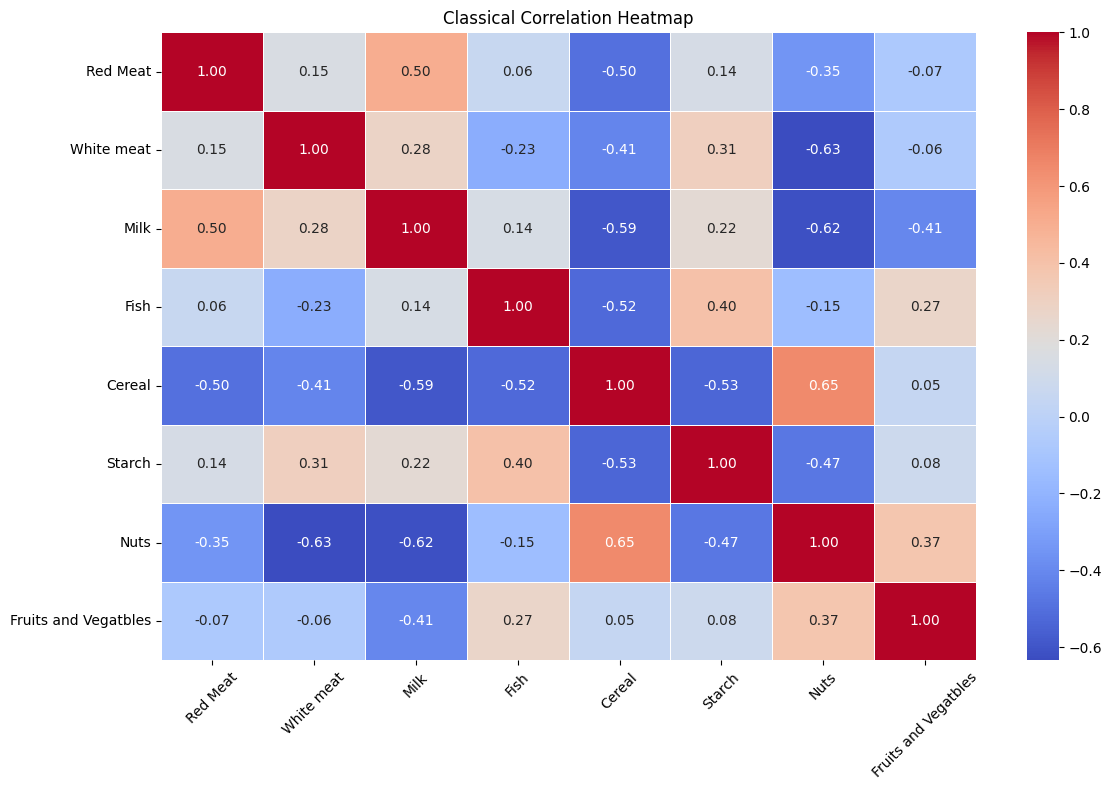

In [5]:
numerical_cols = ['Red Meat', 'White meat', 'Eggs', 'Milk', 'Fish',
                 'Cereal', 'Starch', 'Nuts', 'Fruits and Vegatbles']

numerical_cols = [col for col in numerical_cols if col in nutrition_data.columns]

corr_matrix = nutrition_data[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,
           annot=True,
           cmap='coolwarm',
           fmt=".2f",
           linewidths=0.5)
plt.title("Classical Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("classical_corr.png")
plt.show()